In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
df = pd.read_csv('train.csv')
print(df.head(5))

print(df.shape)         
print(df.isnull().sum())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

Show Missing Data as Percent

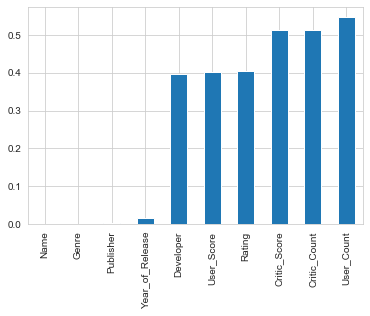

In [3]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = (missing[missing > 0]) / 16719
missing.sort_values(inplace=True)
missing.plot.bar()

Annotated Heatmap of All Correlation Coefficients Between Variables

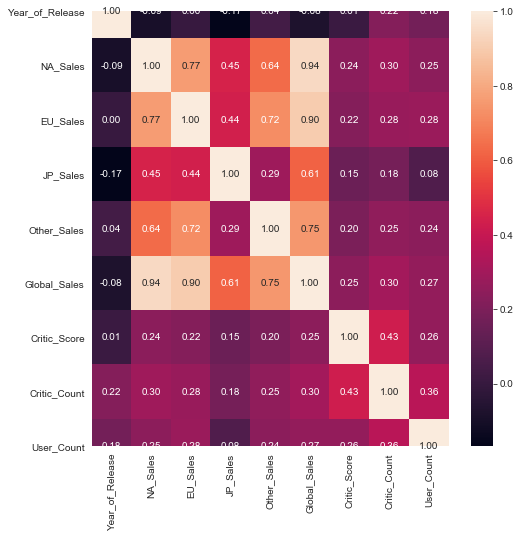

In [4]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

I visualized how many rows there are according to platform type

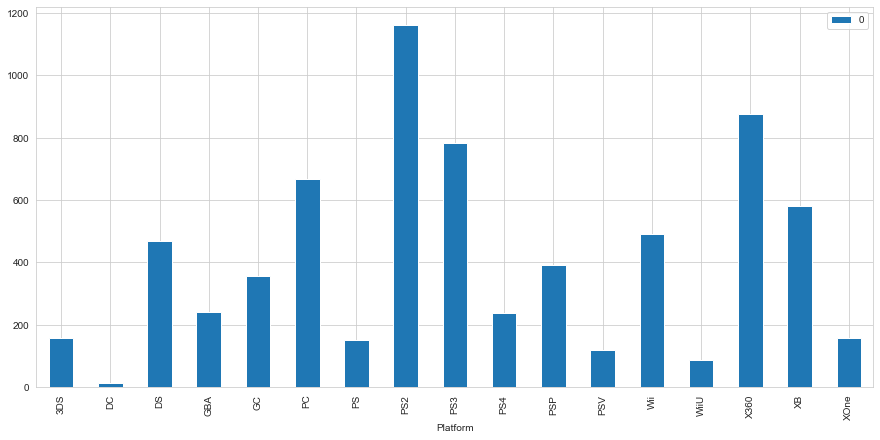

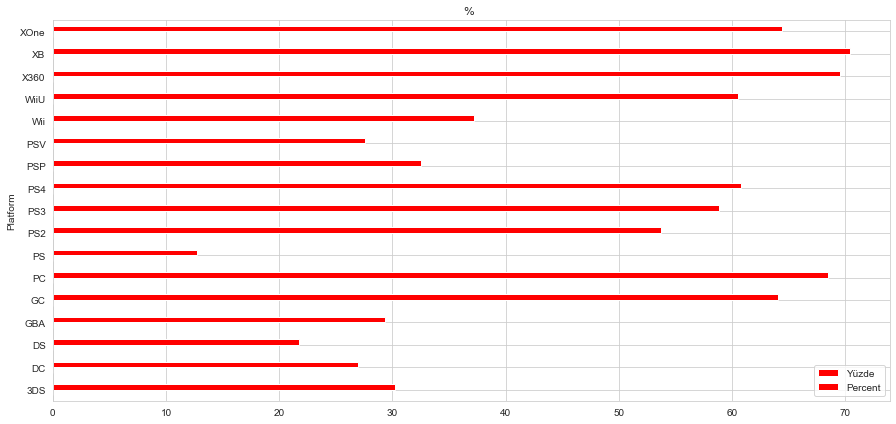

In [10]:
total_data = df.dropna(subset=['Critic_Score', "Developer" ,"Critic_Count" ,"User_Score","User_Count","Rating"])
groupby_platform = total_data.groupby(['Platform']).size().reset_index()
all_platform=df.groupby(['Platform']).size().reset_index()

groupby_platform.plot.bar(x="Platform", figsize= (15, 7))
plt.show()

d = {'Platform': [], 'Yüzde': []}  
final = pd.DataFrame(data = d)


for i in range(len(all_platform)):
    for j in range(len(groupby_platform)):
        if all_platform["Platform"][i] == groupby_platform["Platform"][j]:
           b = groupby_platform[0][j] / all_platform[0][i] * 100
           final.at[j , "Platform"] = groupby_platform["Platform"][j]
           final.at[j , "Percent"] = b
         
            
final.plot.barh(x = "Platform" , figsize=(15,7) , color = "red", title = "% ")
plt.show()

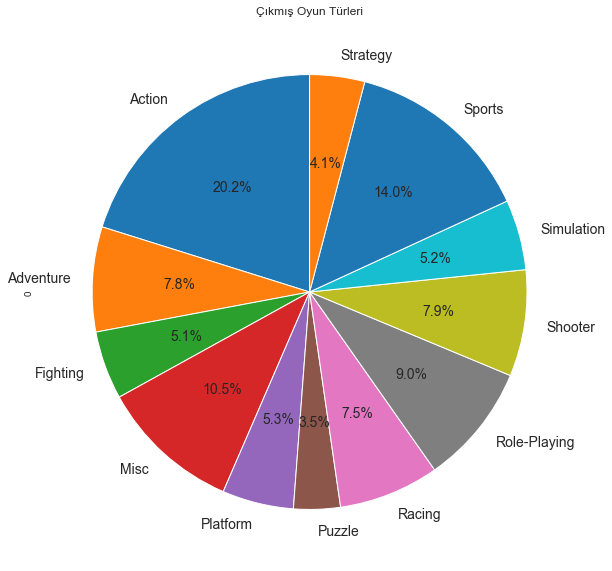

In [6]:
# Percent of Published Game Types in the Market

genre_df =  df[["Genre"]]
genre_group =  genre_df.groupby(['Genre']).size().reset_index()

genre_group.plot(kind='pie', y = 0 , autopct='%1.1f%%',  title = "Çıkmış Oyun Türleri",
startangle=90, shadow=False, labels=genre_group['Genre'], legend = False, fontsize=14, figsize=(10, 10))

plt.show()


Game Type Percents of Published Games

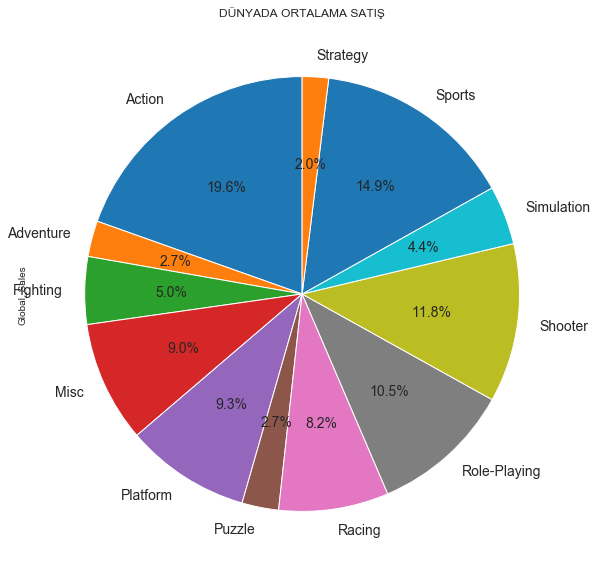

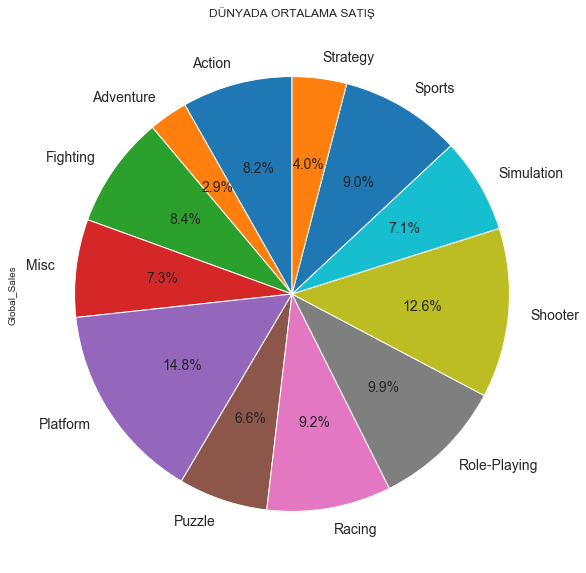

In [11]:
gs_gnr_df =  df[["Genre","Global_Sales"]]
gb_group_sum =  gs_gnr_df.groupby(['Genre']).sum().reset_index()
gb_group_mean =  gs_gnr_df.groupby(['Genre']).mean().reset_index()


gb_group_sum.plot(kind='pie', y = "Global_Sales" , autopct='%1.1f%%',  title = "DÜNYADA TOPLAM SATIŞ",startangle=90,
 shadow=False, labels=gb_group_sum['Genre'], legend = False, fontsize=14, figsize=(10, 10))
plt.show()

gb_group_mean.plot(kind='pie', y = "Global_Sales" , autopct='%1.1f%%',  title = "DÜNYADA ORTALAMA SATIŞ",startangle=90,
 shadow=False, labels=gb_group_mean['Genre'], legend = False, fontsize=14, figsize=(10, 10))
plt.show()

Disburution of Global Sales Which Game Type is Platform 

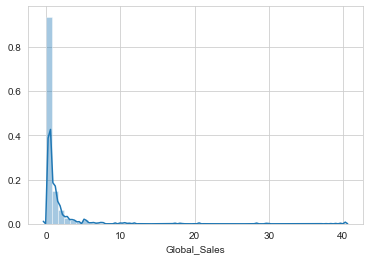

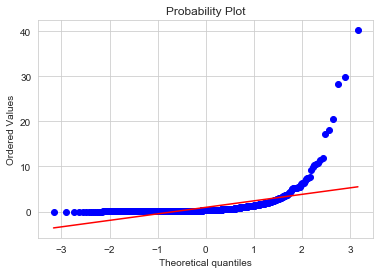

In [13]:
df_globalsales_platform =  gs_gnr_df[gs_gnr_df.Genre == "Platform"]    
sns.distplot(df_globalsales_platform['Global_Sales']);   
fig = plt.figure()
res = stats.probplot(df_globalsales_platform['Global_Sales'], plot=plt)
plt.show()

This Graphic is Same With Previous One but Only Lesser than Seven Million Sold Games 

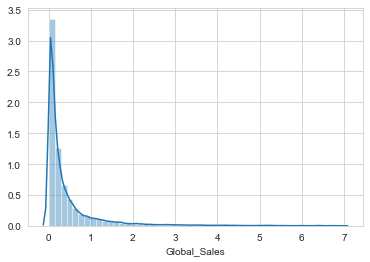

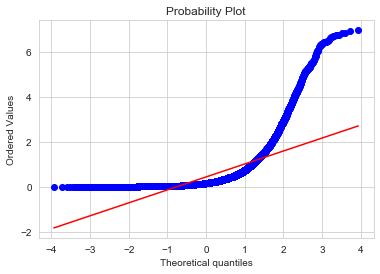

In [15]:
df_genre_global_7 = gs_gnr_df[gs_gnr_df["Global_Sales"]<7]
sns.distplot(df_genre_global_7['Global_Sales']);   
fig = plt.figure()
res = stats.probplot(df_genre_global_7['Global_Sales'], plot=plt)
plt.show()

This Graphic is Same With Previous One but Only Lesser than One Million Sold Games  

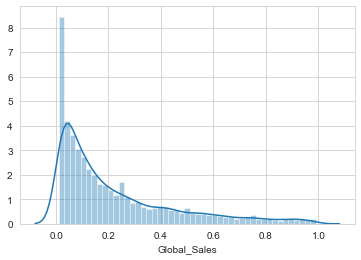

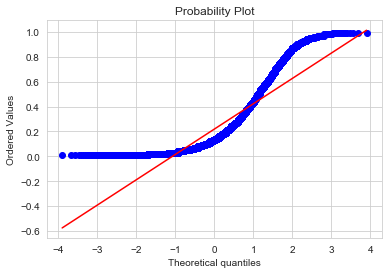

In [16]:
df_genre_global_1 = gs_gnr_df[gs_gnr_df["Global_Sales"]<1]
sns.distplot(df_genre_global_1['Global_Sales']);   
fig = plt.figure()
res = stats.probplot(df_genre_global_1['Global_Sales'], plot=plt)
plt.show()

This Graphic is Same With Previous One but Only Lesser than 0.2 Million Sold Games

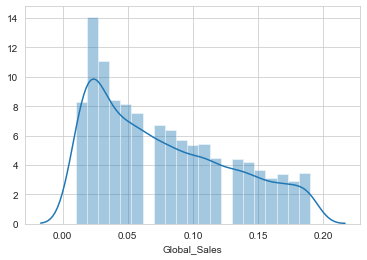

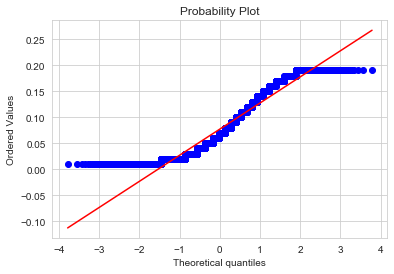

In [17]:
df_genre_global_0_2 = gs_gnr_df[gs_gnr_df["Global_Sales"]<0.2]
sns.distplot(df_genre_global_0_2['Global_Sales']);   
fig = plt.figure()
res = stats.probplot(df_genre_global_0_2['Global_Sales'], plot=plt)
plt.show()

Distribution of Sold Games in All Game Types

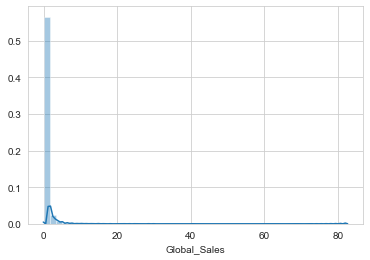

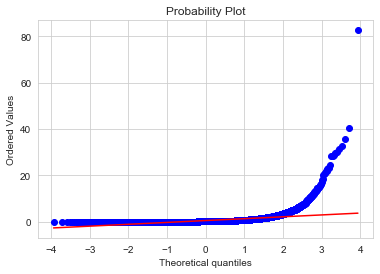

In [19]:
sns.distplot(gs_gnr_df['Global_Sales']);   
fig = plt.figure()
res = stats.probplot(gs_gnr_df['Global_Sales'], plot=plt)
plt.show()

Groupped According to Global Sales in Some Levels

      Genre  Global_Sales
grup                     
0      3858          3859
1      2448          2448
2      2913          2913
3      3562          3562
4      1880          1880
5      1849          1850
6       207           207
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 3 columns):
Genre           16717 non-null object
Global_Sales    16719 non-null float64
grup            16719 non-null object
dtypes: float64(1), object(2)
memory usage: 392.0+ KB


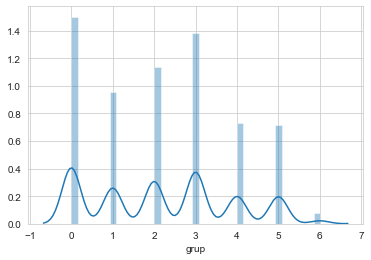

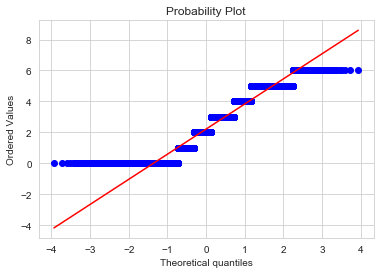

In [22]:
df_genre_global_grupby = gs_gnr_df.copy()
df_genre_global_grupby['grup'] = pd.Series(len(df_genre_global_grupby['Global_Sales']), index=df_genre_global_grupby.index)
df_genre_global_grupby['grup'] = 0 

df_genre_global_grupby.loc[ df_genre_global_grupby['Global_Sales'] <= 0.05, 'grup']= 0
df_genre_global_grupby.loc[(df_genre_global_grupby['Global_Sales'] > 0.05) & (df_genre_global_grupby['Global_Sales'] <= 0.1), 'grup'] = 1
df_genre_global_grupby.loc[(df_genre_global_grupby['Global_Sales'] > 0.1) & (df_genre_global_grupby['Global_Sales'] <= 0.2), 'grup']= 2
df_genre_global_grupby.loc[(df_genre_global_grupby['Global_Sales'] > 0.2) & (df_genre_global_grupby['Global_Sales'] <= 0.5), 'grup']= 3
df_genre_global_grupby.loc[(df_genre_global_grupby['Global_Sales'] > 0.5) & (df_genre_global_grupby['Global_Sales'] <= 1), 'grup']= 4
df_genre_global_grupby.loc[(df_genre_global_grupby['Global_Sales'] > 1) & (df_genre_global_grupby['Global_Sales'] <= 5), 'grup']= 5
df_genre_global_grupby.loc[ df_genre_global_grupby['Global_Sales'] > 5, 'grup']= 6

print(df_genre_global_grupby.groupby("grup").count())

sns.distplot(df_genre_global_grupby['grup']);   
fig = plt.figure()
res = stats.probplot(df_genre_global_grupby['grup'], plot=plt)
plt.show()

df_genre_global_grupby['grup'] = df_genre_global_grupby['grup'].astype('str')
df_genre_global_grupby.info()

Number of Sold Games According to Years

In [ ]:
yearly_sales =  df[["Name","Year_of_Release"]]
yearly_sales_df =yearly_sales.groupby(['Year_of_Release']).count()

yearly_global = df[["Name","Year_of_Release","Global_Sales"]]
yearly_global_df = yearly_global.groupby(["Year_of_Release"])[["Global_Sales"]].sum()

sales_yearly=pd.concat([yearly_global_df,yearly_sales_df ],axis=1).reset_index()

sales_yearly.plot.line(x='Year_of_Release', y='Global_Sales')
plt.show()

Number of Published Games According to Year

In [ ]:
sales_yearly.plot.line(x='Year_of_Release', y='Name')
plt.show()

Console Preferences According To Continents


   Platform  NA_Sales  EU_Sales  JP_Sales
0      2600     90.60      5.47      0.00
1       3DO      0.00      0.00      0.10
2       3DS     83.49     61.48    100.67
3        DC      5.43      1.69      8.56
4        DS    382.67    188.89    175.57
5        GB    114.32     47.82     85.12
6       GBA    187.54     75.25     47.33
7        GC    133.46     38.71     21.58
8       GEN     21.05      6.05      2.70
9        GG      0.00      0.00      0.04
10      N64    139.02     41.06     34.22
11      NES    125.94     21.15     98.65
12       NG      0.00      0.00      1.44
13       PC     94.53    142.44      0.17
14     PCFX      0.00      0.00      0.03
15       PS    336.52    213.61    139.82
16      PS2    583.84    339.29    139.20
17      PS3    393.49    330.29     80.19
18      PS4    108.74    141.09     16.00
19      PSP    109.17     66.68     76.78
20      PSV     12.58     13.12     21.93
21      SAT      0.72      0.54     32.26
22      SCD      1.00      0.36   

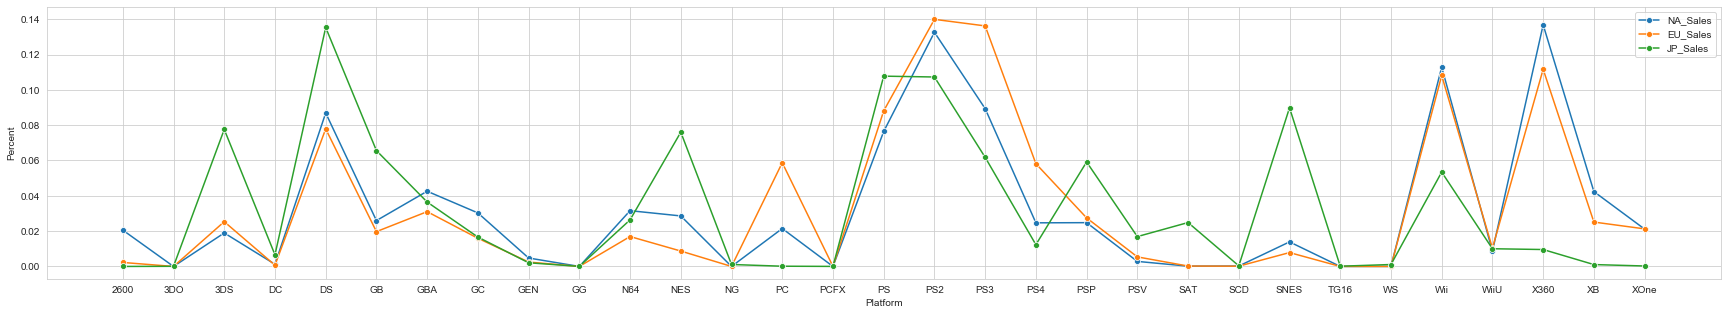

In [23]:
toplam_platform_NA_EU_JP=df.groupby(['Platform'])[["NA_Sales","EU_Sales","JP_Sales"]].sum().reset_index()
a = toplam_platform_NA_EU_JP[["NA_Sales","EU_Sales","JP_Sales"]] / toplam_platform_NA_EU_JP[["NA_Sales","EU_Sales","JP_Sales"]].sum()


print(toplam_platform_NA_EU_JP)
plat_sum = df[["Platform"]]
plat_sum = plat_sum.groupby(["Platform"]).size().reset_index()

deneme = pd.concat([a,plat_sum["Platform"]],axis=1)

plt.figure(figsize=(30,5))
line = sns.lineplot(data=deneme, x="Platform", y="NA_Sales", marker="o", label= "NA_Sales")
line = sns.lineplot(data=deneme, x="Platform", y="EU_Sales", marker="o", label= "EU_Sales")
line = sns.lineplot(data=deneme, x="Platform", y="JP_Sales", marker="o", label= "JP_Sales")
plt.show()

line.set(xticks=deneme.Platform.values)
line.set(ylabel="Percent")
plt.show()


Game Type Preferences According To Continents

           Genre  NA_Sales  EU_Sales  JP_Sales
0         Action    879.01    519.13    161.44
1      Adventure    105.26     63.54     52.30
2       Fighting    223.36    100.33     87.48
3           Misc    407.27    212.74    108.11
4       Platform    445.50    200.35    130.83
5         Puzzle    122.87     50.01     57.31
6         Racing    359.35    236.51     56.71
7   Role-Playing    330.81    188.71    355.46
8        Shooter    592.24    317.34     38.76
9     Simulation    182.19    113.52     63.80
10        Sports    684.43    376.79    135.54
11      Strategy     68.55     45.17     49.66


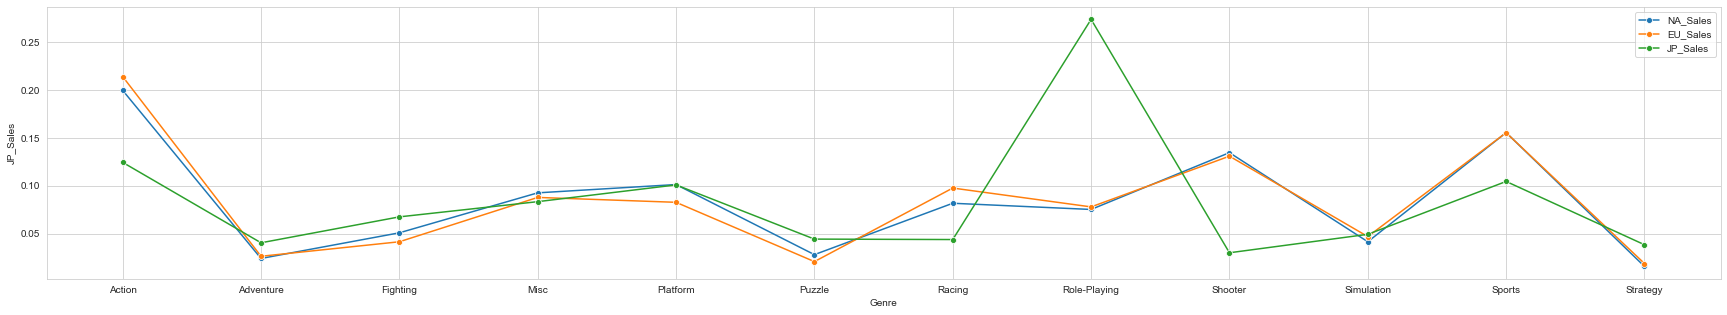

In [25]:
toplam_genre_NA_EU_JP=df.groupby(['Genre'])[["NA_Sales","EU_Sales","JP_Sales"]].sum().reset_index()
toplam_genre = toplam_genre_NA_EU_JP[["NA_Sales","EU_Sales","JP_Sales"]] / toplam_genre_NA_EU_JP[["NA_Sales","EU_Sales","JP_Sales"]].sum()



print(toplam_genre_NA_EU_JP)
genre_sum = df[["Genre"]]
genre_sum = genre_sum.groupby(["Genre"]).size().reset_index()

genre_sales = pd.concat([toplam_genre,genre_sum["Genre"]],axis=1)


plt.figure(figsize=(30,5))
line = sns.lineplot(data=genre_sales, x="Genre", y="NA_Sales", marker="o", label= "NA_Sales")
line = sns.lineplot(data=genre_sales, x="Genre", y="EU_Sales", marker="o", label= "EU_Sales")
line = sns.lineplot(data=genre_sales, x="Genre", y="JP_Sales", marker="o", label= "JP_Sales")
plt.show()

line.set(xticks=genre_sales.Genre.values)
line.set(ylabel="Percent")
plt.show()